# Credit Card Fraud Analysis


<div>The used dataset can be found <a href="#">here</a>. </div>

### Let's import our needed librairies

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# visualiation
import matplotlib.pyplot as plt

# model training
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression

# metrics
from sklearn.metrics import f1_score # F1-score

In [2]:
# reading our csv file after converting the comma-separated-text into columns
df = pd.read_csv('creditcardFraud.csv', sep=";")
df

H:\Programs\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  object 
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# counting the occurrences of the 2 classes fraud and no fraud
occ_list = df['Class'].value_counts()
occ_list

0    284315
1       492
Name: Class, dtype: int64

we notice that the number of non-fraud class is much much bigger than the fraud one. Claculating their ratio we obtain :

In [7]:
print("The ratio of non frauds : ",occ_list[0]/len(df))
print("The ratio of frauds : ",occ_list[1]/len(df))

The ratio of non frauds :  0.9982725143693799
The ratio of frauds :  0.001727485630620034


As we see, the % of the frauds is much much much lower than the non-frauds. This would be a problem while training our data with a ML algorithm, as our algorithm will learn so little from the fraud cases.
To resolve this problem, there are 3 resampling methods that can adjust our dataset to make it balanced.
* Random Undersampling
* Random Oversampling
* SMOTE (Synthetic Minority Oversampling Technique)

In our case **SMOTE** is the best method to use as it synthesizes new examples for the minority class.

### Now we define our x and y columns

In [3]:
x = df.drop(columns=['Class', 'Time'])
y = df['Class']

### Data visualization

In [17]:
def plot_scatter(x: np.array,y: np.array):
    plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

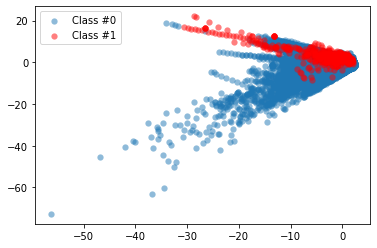

In [18]:
plot_scatter(np.array(x),np.array(y))

Now we can clearly visualize our data and how our fraud cases are few. So let's use the SMOTE

### Applying SMOTE on our dataset

In [9]:
# Define the resampling method
from imblearn.over_sampling import SMOTE 
method = SMOTE()

# Create the resampled feature set
x_resampled, y_resampled = method.fit_resample(x, y)

In [13]:
# counting the occurrences of the new resampled 2 classes fraud and no fraud
pd.value_counts(pd.Series(y_resampled))

0    284315
1    284315
Name: Class, dtype: int64

After applying SMOTE the number of frauds and non-frauds are now the same.

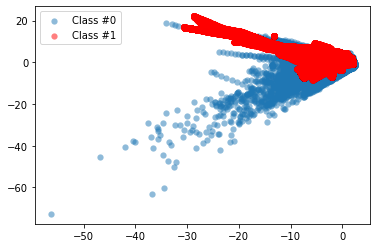

In [12]:
# Plot the resampled data
plot_scatter(np.array(x_resampled),np.array(y_resampled))

Now we can see that our data is more balanced by using the **SMOTE** technique as the minority class was generated with same pattern.

#### Let's split our data into test set(25%) and train set(75%)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.25, random_state=0)

### Let's apply ML algotithms on our splited data

In [50]:
fraudDetect_acc = []
fraudDetect_f1 = []

In [53]:
# Logistic regression
Logic = LogisticRegression()
Logic.fit(x_train, y_train);
logic_score = Logic.score(x_test,y_test)
logic_f1 = f1_score(y_test, Logic.predict(x_test), average='weighted')
fraudDetect_acc.append(logic_score)
fraudDetect_f1.append(logic_f1)

print('Logistic Regression accuracy :', logic_score)
print('Logistic Regression f1-score :', logic_f1)

Logistic Regression accuracy : 0.9581240591454578
Logistic Regression f1-score : 0.9581062691950952


H:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# Decision tree
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train);
tree_score = Tree.score(x_test,y_test)
tree_f1 = f1_score(y_test, Tree.predict(x_test), average='weighted')
fraudDetect_acc.append(tree_score)
fraudDetect_f1.append(tree_f1)

print('Decision tree accuracy : ', tree_score)
print('Decision tree f1-score : ', tree_f1)

Decision tree accuracy :  0.9981007048495336
Decision tree f1-score :  0.9981006988495582


In [55]:
# K-Nearest neighbors
Kneigh = KNeighborsClassifier()
Kneigh.fit(x_train, y_train)
knn_score = Kneigh.score(x_test,y_test)
knn_f1 = f1_score(y_test, Kneigh.predict(x_test), average='weighted')
fraudDetect_acc.append(knn_score)
fraudDetect_f1.append(knn_f1)

print('KNN accuracy : ', knn_score)
print('KNN f1-score : ',knn_f1)

KNN accuracy :  0.9978896720550373
KNN f1-score :  0.9978896489019753


In [56]:
# Support Vector Machine
SVM = SVC()
SVM.fit(x_train, y_train, sample_weight=None)
svm_score = SVM.score(x_test,y_test)
svm_f1 = f1_score(y_test, SVM.predict(x_test), average='weighted')
fraudDetect_acc.append(svm_score)
fraudDetect_f1.append(svm_f1)

print('SVM accuracy :', svm_score)
print('SVM f1-score :', svm_f1)

SVM accuracy : 0.9536923704610363
SVM f1-score : 0.9536391043918612


### Models Evaluation Summary

In [57]:
# generating our scores dataframe
model_names = ['Logistic Reg','DT','KNN','SVM']
accuracy_record = pd.DataFrame({'Model': model_names, 'accuracy': fraudDetect_acc, 
                                'F1 score': fraudDetect_f1})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

print(accuracy_record)

              accuracy  F1 score  acc_mean
Model                                     
Logistic Reg  0.958124  0.958106    0.9600
DT            0.998101  0.998101    1.0000
KNN           0.997890  0.997890    1.0000
SVM           0.953692  0.953639    0.9500
avg           0.976952  0.976934    0.9775


C:\Users\asus\AppData\Local\Temp/ipykernel_3704/1511489798.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
